In [24]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator as kmf
import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
import matplotlib.patches as mpatches

In [25]:
selected_cell = 'Proliferation'

In [26]:
estimation = pd.read_csv('TCGA-LIHC.Mesenchyme.csv',index_col=0)
estimation.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE
Mixture,,,,,,,,,,
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415
TCGA-G3-A3CH-11,0.305872,0.525305,0.017091,0.026283,0.069102,0.006428,0.049920,0,0.972299,0.490151
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281


In [27]:
sample_list = [sample for sample in estimation.index.values if '-01' in sample]
estimation = estimation.reindex(sample_list)

In [28]:
survival_data = pd.read_csv('survival_LIHC_survival.txt',index_col=0,delimiter='\t')
sample_list = [sample for sample in survival_data.index.values if '-01' in sample]
survival_data = survival_data.reindex(sample_list)
survival_data.head()

,_PATIENT,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,
TCGA-2V-A95S-01,TCGA-2V-A95S,0,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN
TCGA-2Y-A9GS-01,TCGA-2Y-A9GS,1,724.0,1.0,724.0,1.0,102.0,1,102.0,NaN
TCGA-2Y-A9GT-01,TCGA-2Y-A9GT,1,1624.0,1.0,1624.0,1.0,1083.0,1,1083.0,NaN
TCGA-2Y-A9GU-01,TCGA-2Y-A9GU,0,1939.0,0.0,1939.0,0.0,1939.0,0,1939.0,NaN
TCGA-2Y-A9GV-01,TCGA-2Y-A9GV,1,2532.0,1.0,2532.0,0.0,2532.0,1,1745.0,NaN


In [29]:
dfs_data = survival_data.filter(['DFI.time', 'DFI'])
dfs_data = dfs_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
dfs_data['DFS_E'] = [binary[event] for event in dfs_data['DFI']]
dfs_data['DFS_T'] = [time/30 for time in dfs_data['DFI.time']]
dfs_data.head()

,DFI.time,DFI,DFS_E,DFS_T
sample,,,,
TCGA-2Y-A9GS-01,102.0,1.0,True,3.400000
TCGA-2Y-A9GT-01,1083.0,1.0,True,36.100000
TCGA-2Y-A9GU-01,1939.0,0.0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,0.0,False,84.400000
TCGA-2Y-A9GW-01,1229.0,1.0,True,40.966667


In [30]:
survival_test = estimation.merge(dfs_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0.0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,0.0,False,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0.0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0.0,False,79.933333
TCGA-BD-A3EP-01,0.596204,0.121961,0.028220,0.035394,0.057758,0.117437,0.043027,0,0.585677,0.838098,409.0,0.0,False,13.633333


In [31]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,DFI.time,DFI,DFS_E,DFS_T
TCGA-BC-A3KG-01,0.237662,0.295909,0.255067,0.044184,0.014209,0.017303,0.135665,0,0.910520,0.430203,209.0,1.0,True,6.966667
TCGA-CC-A7II-01,0.474034,0.000000,0.249325,0.014841,0.047031,0.155973,0.058796,0,0.255960,0.978376,278.0,1.0,True,9.266667
TCGA-G3-A7M9-01,0.528956,0.024654,0.205333,0.006132,0.072064,0.024761,0.138100,0,0.546649,0.928443,56.0,0.0,False,1.866667
TCGA-DD-AA3A-01,0.466428,0.007220,0.201461,0.061293,0.016079,0.135532,0.111986,0,0.497021,0.950214,410.0,0.0,False,13.666667
TCGA-CC-A8HU-01,0.509825,0.179476,0.173384,0.013864,0.038457,0.024540,0.060455,0,0.933901,0.551077,301.0,1.0,True,10.033333


In [32]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['DFS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['DFS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [33]:
#optimization = optimization.dropna()
#optimization = optimization.sort_values('Log Rank Test')
#optimization = int(optimization.iloc[0].name)
optimization = int(len(E)/2)

In [34]:
dfs_cut_level = survival_reorder[selected_cell][optimization]
dfs_cut_level

0.0450406921831771

In [35]:
E = list(survival_reorder['DFS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['DFS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

0.05121

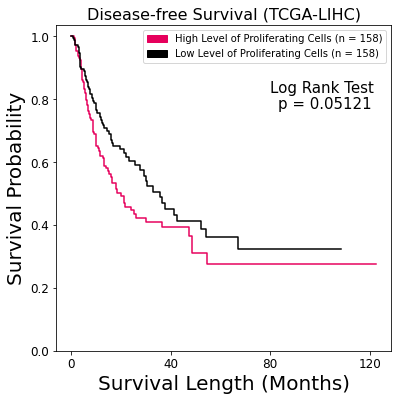

In [36]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#e6005c')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#e6005c',label='High Level of Proliferating Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Proliferating Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.77, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Disease-free Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.DFS.pdf'%selected_cell,format='pdf')

In [37]:
os_data = survival_data.filter(['OS.time', 'OS'])
os_data = os_data.dropna(axis=0,how='any')
binary = {1:True,0:False}
os_data['OS_E'] = [binary[event] for event in os_data['OS']]
os_data['OS_T'] = [time/30 for time in os_data['OS.time']]
os_data.head()

,OS.time,OS,OS_E,OS_T
sample,,,,
TCGA-2Y-A9GS-01,724.0,1,True,24.133333
TCGA-2Y-A9GT-01,1624.0,1,True,54.133333
TCGA-2Y-A9GU-01,1939.0,0,False,64.633333
TCGA-2Y-A9GV-01,2532.0,1,True,84.400000
TCGA-2Y-A9GW-01,1271.0,1,True,42.366667


In [38]:
survival_test = estimation.merge(os_data,left_index=True,right_index=True,how='inner')
survival_test.head()

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-FV-A495-01,0.443809,0.261241,0.083257,0.016736,0.040656,0.147452,0.006849,0,0.956110,0.378415,1.0,0,False,0.033333
TCGA-CC-A3MB-01,0.540845,0.180801,0.060513,0.000000,0.097361,0.000000,0.120480,0,0.940356,0.542547,315.0,1,True,10.500000
TCGA-BC-A3KF-01,0.648937,0.242699,0.000000,0.016786,0.000000,0.032126,0.059452,0,0.948020,0.413964,8.0,0,False,0.266667
TCGA-DD-A4NV-01,0.346874,0.353283,0.000000,0.056060,0.064966,0.122436,0.056381,0,0.925465,0.382281,2398.0,0,False,79.933333
TCGA-CC-A1HT-01,0.602426,0.000000,0.127597,0.014010,0.029641,0.192867,0.033458,0,0.701488,0.921574,101.0,1,True,3.366667


In [39]:
survival_reorder = survival_test.sort_values(selected_cell,axis=0,ascending=False)
survival_reorder

,Other,Hepatocytes,Proliferation,vSMC,Stellate cells,CAFs,Pericytes,P-value,Correlation,RMSE,OS.time,OS,OS_E,OS_T
TCGA-BC-A3KG-01,0.237662,0.295909,0.255067,0.044184,0.014209,0.017303,0.135665,0,0.910520,0.430203,680.0,0,False,22.666667
TCGA-CC-A7II-01,0.474034,0.000000,0.249325,0.014841,0.047031,0.155973,0.058796,0,0.255960,0.978376,399.0,0,False,13.300000
TCGA-QA-A7B7-01,0.233671,0.357708,0.220265,0.000000,0.000000,0.044870,0.143486,0,0.883694,0.475970,94.0,0,False,3.133333
TCGA-G3-A7M9-01,0.528956,0.024654,0.205333,0.006132,0.072064,0.024761,0.138100,0,0.546649,0.928443,56.0,1,True,1.866667
TCGA-DD-AA3A-01,0.466428,0.007220,0.201461,0.061293,0.016079,0.135532,0.111986,0,0.497021,0.950214,410.0,1,True,13.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-G3-AAV1-01,0.679526,0.173907,0.000000,0.026970,0.000000,0.029514,0.090083,0,0.859789,0.619004,359.0,1,True,11.966667
TCGA-DD-AAEK-01,0.608014,0.227100,0.000000,0.028657,0.059647,0.017842,0.058739,0,0.897621,0.510452,1067.0,0,False,35.566667
TCGA-DD-AAW0-01,0.549791,0.202568,0.000000,0.009555,0.048728,0.150164,0.039195,0,0.905789,0.539082,2015.0,0,False,67.166667
TCGA-ZP-A9D4-01,0.745073,0.174670,0.000000,0.007912,0.013493,0.000000,0.058853,0,0.770662,0.685447,395.0,0,False,13.166667


In [ ]:
running_length = len(survival_reorder)

logrank_tests = []
cut_points = []

for i in range(running_length):
    cut_point = int(i+1)
    E = list(survival_reorder['OS_E'])
    mid_point = int(len(E)/2)
    E_high = E[:cut_point]
    E_low = E[cut_point:]
    S = list(survival_reorder['OS_T'])
    S_high = S[:cut_point]
    S_low = S[cut_point:]
    results = logrank_test(S_high,S_low,E_high,E_low)
    p = results.p_value
    cut_points.append(cut_point)
    logrank_tests.append(p)

optimization = pd.DataFrame(logrank_tests,index=cut_points,columns=['Log Rank Test'])

In [ ]:
optimization = optimization.dropna()
optimization = optimization.sort_values('Log Rank Test')
optimization = int(optimization.iloc[0].name)
optimization

In [ ]:
os_cut_level = survival_reorder[selected_cell][optimization]
os_cut_level

In [ ]:
E = list(survival_reorder['OS_E'])
cut_point = optimization
E_high = E[:cut_point]
E_low = E[cut_point:]
S = list(survival_reorder['OS_T'])
S_high = S[:cut_point]
S_low = S[cut_point:]
results = logrank_test(S_high,S_low,E_high,E_low)
p = results.p_value
p = round(p,5)
p

In [ ]:
plt.figure(figsize=(6,6))
t,s = kmf(E_high, S_high)
plt.step(t,s,c='#3333cc')
t,s = kmf(E_low, S_low)
plt.step(t,s,c='k')
plt.xticks(np.arange(0,121,40),fontsize=12)
plt.yticks(np.arange(0,1.1,0.2),fontsize=12)
plt.xlabel('Survival Length (Months)', fontsize=20)
plt.ylabel('Survival Probability',fontsize=20)
high_patch = mpatches.Patch(color='#3333cc',label='High Level of Proliferating Cells (n = %s)'%len(E_high))
low_patch = mpatches.Patch(color='k',label='Low Level of Proliferating Cells (n = %s)'%len(E_low))
plt.text(80,0.82, 'Log Rank Test',fontsize=15)
plt.text(83,0.76, 'p = %s'%p,fontsize=15)
plt.legend(handles=[high_patch,low_patch],fontsize=10)
plt.title('Overall Survival (TCGA-LIHC)',fontsize=16)
plt.savefig('TCGA-LIHC.%s.OS.pdf'%selected_cell,format='pdf')

In [ ]:
estimation = estimation.sort_values(selected_cell,ascending=False)
x = []
y = []
for key,value in enumerate(estimation[selected_cell]):
    x.append(key)
    y.append(value)

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x,y,color='orange')
plt.axhline(y=os_cut_level, xmin=0, xmax=100,color='#3333cc')
plt.axhline(y=dfs_cut_level, xmin=0, xmax=100,color='#e6005c')
plt.ylabel('Estimated Cell Fraction',fontsize=15)
plt.xlabel('TCGA-LIHC Cohort',fontsize=15)
plt.title('Cutting Point - Proliferating Cells',fontsize=15)
dfs_patch = mpatches.Patch(color='#e6005c',label='DFS Cutting Level')
os_patch = mpatches.Patch(color='#3333cc',label='OS Cutting Level')
plt.legend(handles=[dfs_patch,os_patch],fontsize=12)
#plt.yscale("log")
plt.savefig('Cutting_Point.%s'%selected_cell,format='pdf')